In [347]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit    
from matplotlib.colors import LogNorm

In [113]:
steps = 21
#lower energy bound approx 1.8


In [290]:
FWHMmatix = []
def get_data(i,j):
    data = np.loadtxt(f'/Users/amaliedavidsen/Documents/KVASIR/KVASIRinstr/FWHM_d_SA_{np.round(1+i*0.15,2)}/{j}/Detector.dat')
    data_y = data[20,:]
    data_err = data[60,:]
    return data_y, data_err

def FWHM():
    for i in range(steps):
        FWHMarray=[]
        for j in range(steps):
            data_y, data_err = get_data(i,j)
            x = np.linspace(-20,20,40)
            plt.errorbar(x, data_y, yerr=data_err, fmt='o', label=f'{np.round(1+i*0.15,2)}')
            max = np.max(data_y)

            FWHM = x[np.where(data_y > max/2)[0]][-1]*2
            FWHMarray.append(FWHM)
        FWHMmatix.append(FWHMarray)
    return 
            
            

In [291]:
FWHM()


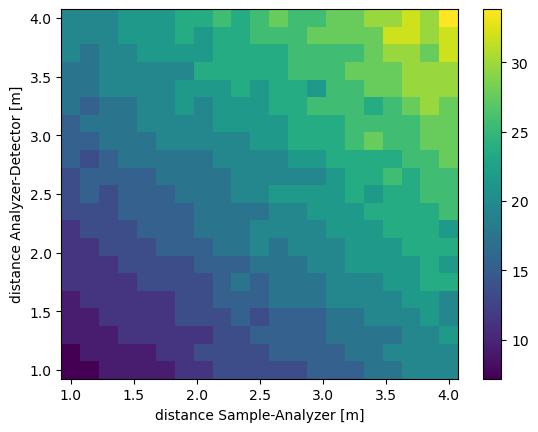

In [292]:
im = plt.pcolormesh(np.linspace(1,4,21), np.linspace(1,4,21),FWHMmatix)
plt.xlabel('distance Sample-Analyzer [m]')
plt.ylabel('distance Analyzer-Detector [m]') 
plt.colorbar(im)


In [283]:

def get_data(i):
    data = np.loadtxt(f'/Users/amaliedavidsen/Documents/KVASIR/KVASIRinstr/energy_resolution/{i}/E_monitor.dat')
    data_x = data[:,0] 
    data_y = data[:,1] 
    data_err = data[:,2] 
    return  data_x, data_y, data_err

def FWHM_E():
    FWHM_E_array = []
    for i in range(100):
        data_x, data_y, data_err = get_data(i)

        mean = np.sum(data_x*data_y)/np.sum(data_y)

        std = np.sqrt( np.sum(data_y*(data_x - mean)**2)/np.sum(data_y) )
        FWHM = 2.355*std
        FWHM_E_array.append(FWHM)
    plt.plot(np.linspace(1.8, 2.5, 100)[:-3], FWHM_E_array[:-3])
    plt.xlabel('Energy [MeV]')
    plt.ylabel('FWHM [MeV]')
    return 


/var/folders/qf/1p_ffz6j5ljc117p2xzz4gsm0000gn/T/ipykernel_82887/3302536184.py:13: RuntimeWarning: invalid value encountered in double_scalars
  mean = np.sum(data_x*data_y)/np.sum(data_y)


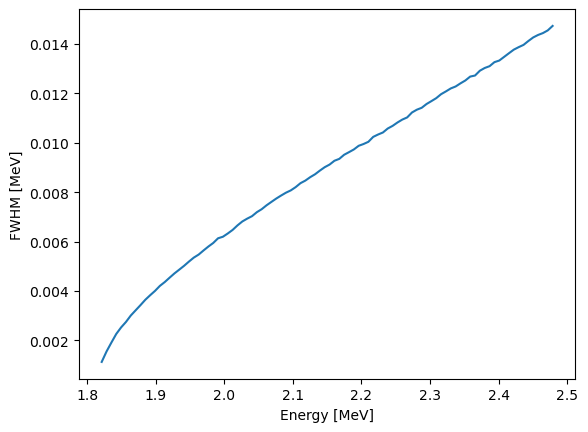

In [284]:
FWHM_E()


In [503]:

def get_data(i,j,n):
    data = np.loadtxt(f'/Users/amaliedavidsen/Documents/KVASIR/KVASIRinstr/FWHM_E{list[n]}_d_AD_{np.round(1+i*0.15,2)}/{j}/E_monitor.dat')
    data_x = data[:,0]
    data_y = data[:,1]
    data_err = data[:,2]
    return data_x, data_y, data_err

def FWHM_E_d(n, matrix):
    for i in range(21):
        FWHM_E_array=[]
        for j in range(41):
            data_x, data_y, data_err = get_data(i,j, n)

            mean = np.sum(data_x*data_y)/np.sum(data_y)

            std = np.sqrt( np.sum(data_y*(data_x - mean)**2)/np.sum(data_y) )
            FWHM = 2.355*std
            FWHM_E_array.append(FWHM)
        matrix.append(FWHM_E_array)
    return

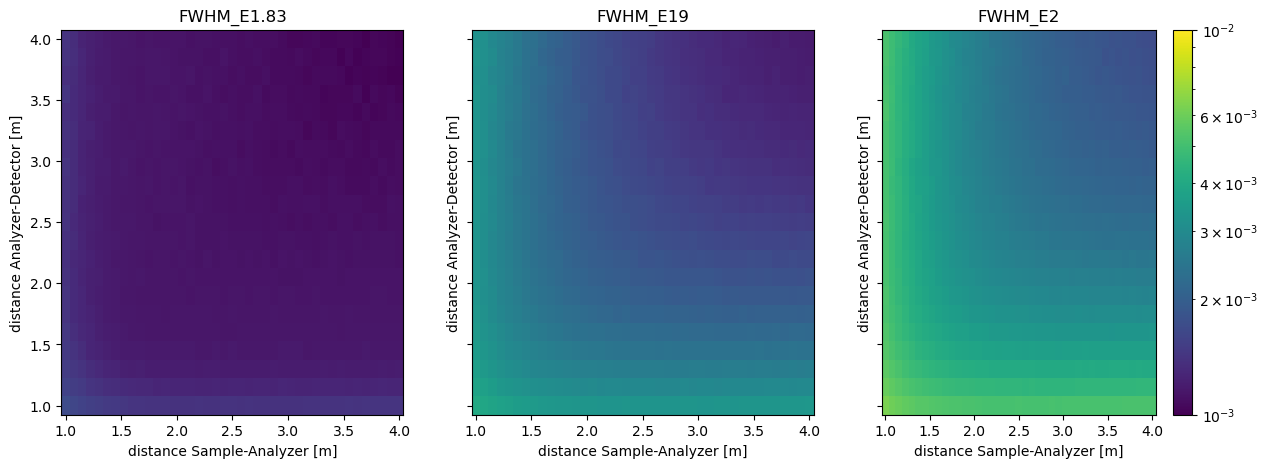

In [519]:
fig, ax = plt.subplots(1,3, figsize=(15,5), sharey=True, sharex=True )

list =('',19,2)
for i in range(3):
    FWHM_E_matrix = []
    FWHM_E_d(i, FWHM_E_matrix)
    im = ax[i].pcolormesh(np.linspace(1,4,41), np.linspace(1,4,21),FWHM_E_matrix, norm = LogNorm(vmin =0.001, vmax = 0.01))
 
    ax[i].set_xlabel('distance Sample-Analyzer [m]')
    ax[i].set_ylabel('distance Analyzer-Detector [m]') 
    if list[i] == '':
        ax[i].set_title(f'FWHM_E1.83')
    else:
        ax[i].set_title(f'FWHM_E{list[i]}')
fig.colorbar(im)

In [528]:
FWHM_angle_matix = []
def get_data(i,j):
    data_y = []
    for k in range(-6,7):
        if k < 0:
            data = np.loadtxt(f'/Users/amaliedavidsen/Documents/KVASIR/KVASIRinstr/FWHM_angle_d_AD_{np.round(1+i*0.15,2)}/{j}/Detector_m{abs(k)}.dat')
        if k >= 0:
            data = np.loadtxt(f'/Users/amaliedavidsen/Documents/KVASIR/KVASIRinstr/FWHM_angle_d_AD_{np.round(1+i*0.15,2)}/{j}/Detector_{k}.dat')
        data = data[:40,:]
        data_y.append(np.sum(data))
    if 2*i == j:
        data_y = np.zeros(13)
    data_x = np.linspace(-4.2,4.2,13)
    return data_x, data_y

def FWHM_angle_d():
    for i in range(21):
        FWHM_angle_array=[]
        for j in range(41):
            data_x, data_y = get_data(i,j)
            plt.plot(data_x, data_y)

            mean = np.sum(data_x*data_y)/np.sum(data_y)

            std = np.sqrt( np.sum(data_y*(data_x - mean)**2)/np.sum(data_y) )
            FWHM = 2.355*std
            FWHM_angle_array.append(FWHM)
        FWHM_angle_matix.append(FWHM_angle_array)
    return 

/var/folders/qf/1p_ffz6j5ljc117p2xzz4gsm0000gn/T/ipykernel_82887/219569435.py:23: RuntimeWarning: invalid value encountered in double_scalars
  mean = np.sum(data_x*data_y)/np.sum(data_y)


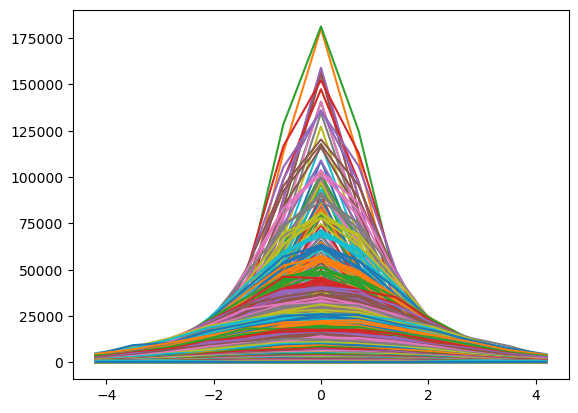

In [529]:
FWHM_angle_d()



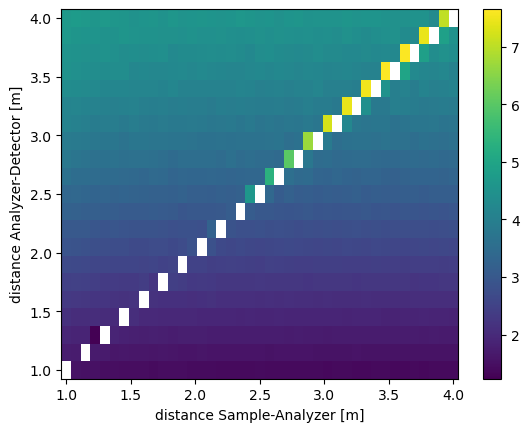

In [530]:
im = plt.pcolormesh(np.linspace(1,4,41), np.linspace(1,4,21),FWHM_angle_matix)
 
plt.xlabel('distance Sample-Analyzer [m]')
plt.ylabel('distance Analyzer-Detector [m]') 
plt.colorbar(im)

In [524]:
0.7*6

4.199999999999999